<a href="https://colab.research.google.com/github/souhahd/Machine-Learning/blob/main/facialExpression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/facialExpression/

/content/drive/MyDrive/facialExpression


In [4]:
!ls

checkpoint  fer2013


Extract the image dataset 

In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [6]:
df= pd.read_csv("fer2013/fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])


Data Dictionary

In [8]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
label_to_text

{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

Visulize sample dataset

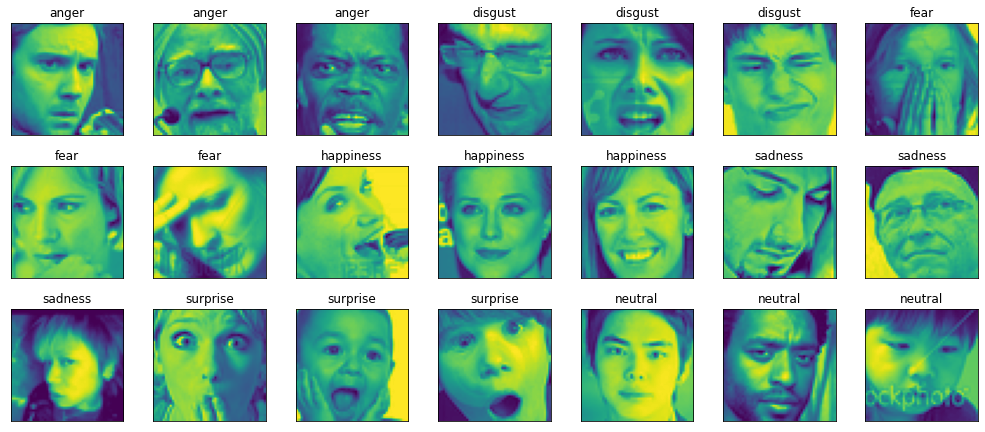

In [9]:
fig = pyplot.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()
  

In [10]:
img_array=df.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48,48).astype('float32'))

In [11]:
img_array= np.stack(img_array,axis=0)

In [12]:
labels=df.emotion.values
labels

array([0, 0, 2, ..., 0, 3, 2])

In [13]:
X_train,X_test,y_train,y_test=train_test_split(img_array,labels,test_size=.2)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((28709, 48, 48), (7178, 48, 48), (28709,), (7178,))

In [15]:
X_train=X_train/255
y_test=y_test/255

In [16]:
basemodel = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [17]:
basemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [18]:
basemodel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy']
                  )

In [19]:
import os
try:
  os.mkdir('checkpoint')
except:
    pass

In [20]:
file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)


call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')


In [21]:
basemodel.fit(X_train,y_train,epochs=20,validation_split=.1,callbacks=call_back)

Epoch 1/20
808/808 [==============================] - ETA: 0s - loss: 1.8028 - accuracy: 0.2576
Epoch 00001: val_accuracy improved from -inf to 0.23232, saving model to checkpoint/best_model.h5
808/808 [==============================] - 27s 18ms/step - loss: 1.8028 - accuracy: 0.2576 - val_loss: 1.7954 - val_accuracy: 0.2323
Epoch 2/20
807/808 [============================>.] - ETA: 0s - loss: 1.6819 - accuracy: 0.3339
Epoch 00002: val_accuracy improved from 0.23232 to 0.36538, saving model to checkpoint/best_model.h5
808/808 [==============================] - 14s 17ms/step - loss: 1.6818 - accuracy: 0.3340 - val_loss: 1.6141 - val_accuracy: 0.3654
Epoch 3/20
808/808 [==============================] - ETA: 0s - loss: 1.5555 - accuracy: 0.4036
Epoch 00003: val_accuracy improved from 0.36538 to 0.41937, saving model to checkpoint/best_model.h5
808/808 [==============================] - 14s 17ms/step - loss: 1.5555 - accuracy: 0.4036 - val_loss: 1.5226 - val_accuracy: 0.4194
Epoch 4/20
80

actuel label is surprise
 predicted label is surprise


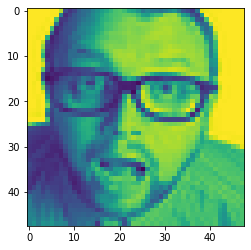

KeyboardInterrupt: ignored

In [37]:
final_model= tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time
for k in range(40):
  print(f'actuel label is {label_to_text[k]}')
  predicted_class = final_model.predict(tf.expand_dims(X_test[k],0)).argmax()
  
  print(f' predicted label is {label_to_text[predicted_class]}')
  pyplot.imshow(X_test[k].reshape((48,48)))
  pyplot.show()
  time.sleep(2)
  clear_output(wait=True)